<a href="https://colab.research.google.com/github/shuchi111/Task--01.Prediction_Using_SupervisedLearning/blob/string/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression with Python Scikit Learn**

In this part, we'll look at how regression functions can be implemented using the Python Scikit-Learn module for machine learning. We'll start with a straightforward linear regression with only two variables.

**Simple Linear Regression**

In this regression exercise, we will estimate a student's expected grade % depending on the number of hours they spent studying. Given that there are only two variables, this linear regression exercise is straightforward.

In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading data from remote link
url="http://bit.ly/w-data"
s_data = pd.read_csv(url)
print(" Data imported successfully")

s_data.head(10)

 Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


To visually inspect our dataset and determine whether we can manually identify any relationships between the data, let's put our data points on a 2-D graph. With the script below, we can develop the story:




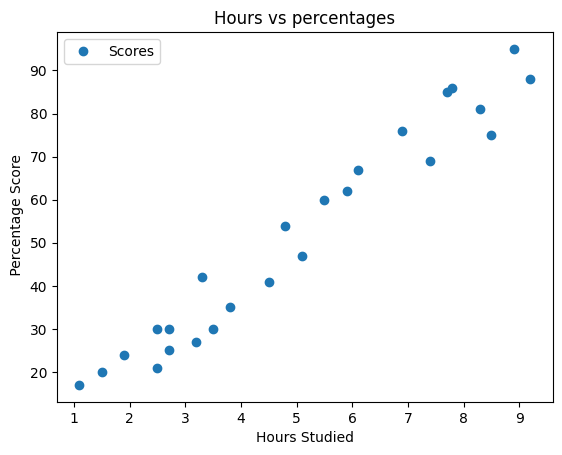

In [6]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style="o")
plt.title('Hours vs percentages')
plt.xlabel('Hours Studied')
plt.ylabel(' Percentage Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

The next step is to divide this data into training and test sets once we have our attributes and labels. Scikit-Learn's built-in train_test_split() method will be used to accomplish this:


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

**Training the Algorithms**

We have to split our data into training and testing sets, and now is finally the time to train our algorithm.

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(" Training complete")

 Training complete


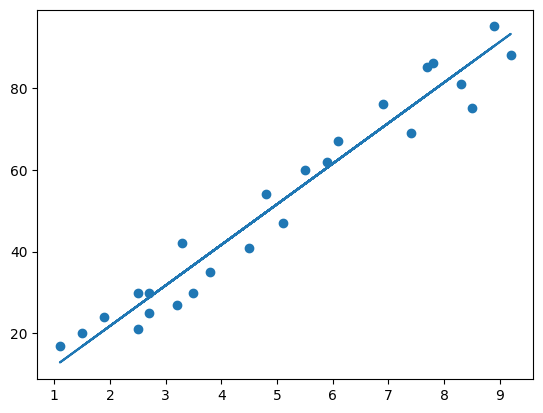

In [12]:
# Plotting the regression Line
line = regressor.coef_*X+regressor.intercept_

#plotting for the test data
plt.scatter(X,y)
plt.plot(X, line);
plt.show()

**Making Predictions**

In [13]:
print(X_test) #Testing data - In Hours
y_pred = regressor.predict(X_test)    #Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [15]:
# comparing Actual vs Predicted 
df = pd.DataFrame({ ' Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
from sklearn.linear_model import LinearRegression

# Assuming you have training data `X_train` and `y_train`

regressor = LinearRegression()
regressor.fit(X_train, y_train)

hours = 9.25
own_pred = regressor.predict([[hours]])  # Note the double brackets for a single sample
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating the Model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
     

Mean Absolute Error: 4.183859899002982
